In [1]:
# Load python modules
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from tqdm import tqdm
from sklearn.utils import shuffle 
from sklearn.metrics import confusion_matrix
import cv2

In [2]:
class_names = ['Glass', 'Metal', 'Paper', 'Textile']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)
IMAGE_SIZE = (64, 64)

In [3]:
def load_data():
    """
        Load the data from local folder
        
    """
    
    datasets = ['C:/Mani/1_MSC Data Science/7 Data Science Project/Dataset/dataset1/train_ds',
               'C:/Mani/1_MSC Data Science/7 Data Science Project/Dataset/dataset1/test_ds']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [4]:
#Prepare dataset for training and testing
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:/Mani/1_MSC Data Science/7 Data Science Project/Dataset/dataset1/train_ds


100%|█████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 193.80it/s]


Loading C:/Mani/1_MSC Data Science/7 Data Science Project/Dataset/dataset1/test_ds


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 183.46it/s]


In [5]:
#Check the training and testing image shape
train_images.shape, test_images.shape

((160, 64, 64, 3), (60, 64, 64, 3))

In [6]:
# Shuffle only the training dataset
train_images, train_labels = shuffle(train_images, train_labels, random_state=123)

In [7]:
#Check the number of training dataset
print('No of training images:', train_images.shape[0])

No of training images: 160


In [8]:
#Scale image data from 0 to 1 
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [9]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image Number {} : '.format(index) + class_names[labels[index]])
    plt.show()

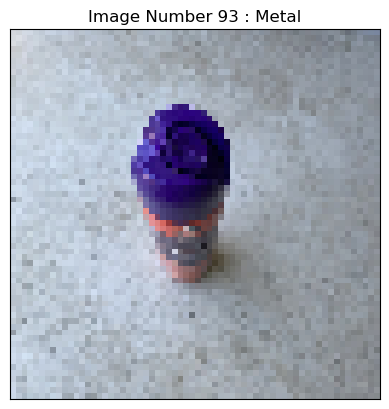

In [10]:
display_random_image(class_names, train_images, train_labels)